In [2]:
# Step 1: Set up the environment
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt








In [4]:

# Step 2: Load the dataset
VOCAB_SIZE = 20000  # Number of most frequent words to keep
MAX_LEN = 250       # Maximum length of reviews

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:

# Step 3: Data preprocessing
# Pad sequences to make them uniform length
X_train = pad_sequences(X_train, maxlen=MAX_LEN)
X_test = pad_sequences(X_test, maxlen=MAX_LEN)


In [6]:

# Step 4: Explore the data
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("\nSample review:", X_train[0])
print("\nSample label:", y_train[0])  # 0=negative, 1=positive

# Decode a review back to English
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print("\nDecoded review:", decode_review(X_train[0]))


Training data shape: (25000, 250)
Testing data shape: (25000, 250)

Sample review: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     1    14    22    16
    43   530   973  1622  1385    65   458  4468    66  3941     4   173
    36   256     5    25   100    43   838   112    50   670     2     9
    35   480   284     5   150     4   172   112   167     2   336   385
    39     4   172  4536  1111    17   546    38    13   447     4   192
    50    16     6   147  2025    19    14    22     4  1920  4613   469
     4    22    71    87    12    16    43   530    38    76    15    13
  1247     4    22    17   515    17    12    16   626    18 19193     5
    62   386    12     8   316     8   106     5     4  2223  5244    16
   480    66  3785    33     4   130    12    16    38   619     5    25
   124    51    36   135    48    25  141

In [7]:

# Step 5: Build the model
EMBEDDING_DIM = 32

model = Sequential([
    Embedding(VOCAB_SIZE, EMBEDDING_DIM, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(24, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Step 6: Compile the model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [11]:

# Step 7: Train the model
history = model.fit(
    X_train,
    y_train,
    epochs=5,
    validation_split=0.2,
    batch_size=256,
    callbacks=[EarlyStopping(patience=2)]
)


Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 175s 2s/step - accuracy: 0.9694 - loss: 0.0927 - val_accuracy: 0.8800 - val_loss: 0.3854
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 197s 2s/step - accuracy: 0.9774 - loss: 0.0761 - val_accuracy: 0.8584 - val_loss: 0.4811
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9827 - loss: 0.0601 - val_accuracy: 0.8632 - val_loss: 0.4903


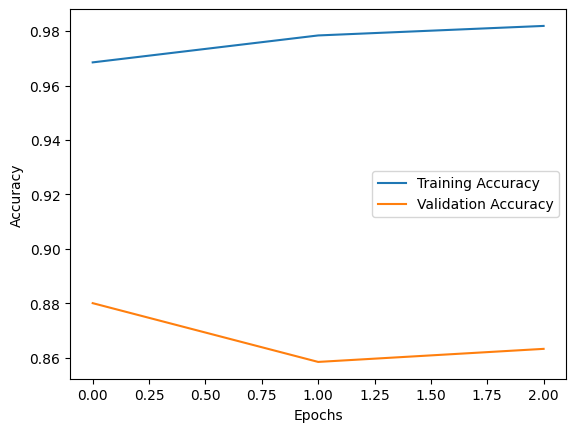

782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 110ms/step - accuracy: 0.8503 - loss: 0.5190

Test Accuracy: 0.85
Test Loss: 0.52


In [13]:

# Step 8: Evaluate the model
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'\nTest Accuracy: {test_acc:.2f}')
print(f'Test Loss: {test_loss:.2f}')

In [9]:

# Step 9: Make predictions
def predict_sentiment(text):
    # Preprocess input text
    encoded = [word_index[word] if word in word_index and word_index[word] < VOCAB_SIZE else 2 for word in text.split()]
    padded = pad_sequences([encoded], maxlen=MAX_LEN)
    prediction = model.predict(padded)
    return 'Positive' if prediction > 0.5 else 'Negative'

# Test with sample reviews
sample_review = "This movie was absolutely fantastic! The acting was superb and the storyline was captivating. It was a good movie."
print(f"\nPrediction: {predict_sentiment(sample_review)}")

sample_review2 = "I hated this movie. It was boring and the acting was terrible."
print(f"Prediction: {predict_sentiment(sample_review2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step

Prediction: Negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Negative
